In [1]:
%cd ..

/misc/vlgscratch4/LakeGroup/wentao/multimodal-baby


In [2]:
import itertools
import functools
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from PIL import Image
from collections import Counter, defaultdict
from multimodal.multimodal_saycam_data_module import EXTRACTED_FRAMES_DIRNAME
from multimodal.multimodal_data_module import UNK_TOKEN
from analysis_tools.utils import get_n_rows
from analysis_tools.build_data import *
import analysis_tools.plotting as plotting


# set default settings for plotting; may change for each plot
figsize = (8, 7)
fig_sz = 2.2
paper_context = sns.plotting_context('paper')
paper_context.update({
    'font.size': 10.,
    'axes.labelsize': 10.,
    'axes.titlesize': 14.,
    'xtick.labelsize': 8.8,
    'ytick.labelsize': 8.8,
    'legend.fontsize': 8.8,
    'legend.title_fontsize': 9.6,
})
unticked_relation_style = sns.axes_style('white')
unticked_relation_style.update({
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.right': False,
    'axes.spines.top': False,
})
font = 'serif'
sns.set_theme(
    context=paper_context,
    style=unticked_relation_style,
    font=font,
    rc={
        'figure.figsize': figsize,
    }
)

pd.options.display.width = 120

#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams["savefig.pad_inches"] = 0.
plot_format = 'pdf'
saving_fig = False

if saving_fig:
    def _save_fig(fname, format='png'):
        print(f'saving plot {fname}')
        plt.savefig(f'plots/{fname}.{format}', transparent=True)
        plt.clf()
    plotting.output_fig = functools.partial(_save_fig, format=plot_format)

output_fig = plotting.output_fig


def plot_dist(data, x=None, xlim_n=50, title=None):
    xlim = (-0.5, xlim_n + 0.5)

    g = sns.displot(df, x=x, discrete=True)
    g.set(xlim=xlim)
    g.figure.set_size_inches(*figsize)
    if title is not None:
        plt.title(title)
        _title = title
    else:
        _title = "distribution"
    output_fig(_title)

    g = sns.displot(df, x=x, kind='ecdf')
    g.set(xlim=xlim)
    g.figure.set_size_inches(*figsize)
    _title_cum = _title + ' (cumulative)'
    if title is not None:
        plt.title(_title_cum)
    output_fig(_title_cum)

/home/ww2135/.local/lib/python3.9/site-packages/pytorch_lightning/core/datamodule.py:73: LightningDeprecationWarning: DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
  rank_zero_deprecation(


Using base transforms
Calling prepare_data!
SAYCam transcripts have already been downloaded. Skipping this step.
Transcripts have already been renamed. Skipping this step.
Transcripts have already been preprocessed. Skipping this step.
Training frames have already been extracted. Skipping this step.
Training metadata files have already been created. Skipping this step.
Shuffled training metadata file has already been created. Skipping this step.
Evaluation frames have already been filtered. Skipping this step.
Evaluation frames have already been extracted. Skipping this step.
Filtered evaluation frames have already been extracted. Skipping this step.
Evaluation metadata files have already been created. Skipping this step.
Evaluation metadata files have already been created. Skipping this step.
Extra evaluation metadata files have already been created. Skipping this step.
Extra evaluation metadata files have already been created. Skipping this step.
Vocabulary file already exists. Skipp

/tmp/ipykernel_27754/1222693688.py:23: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  counter = Counter(value for index, value in s.iteritems())


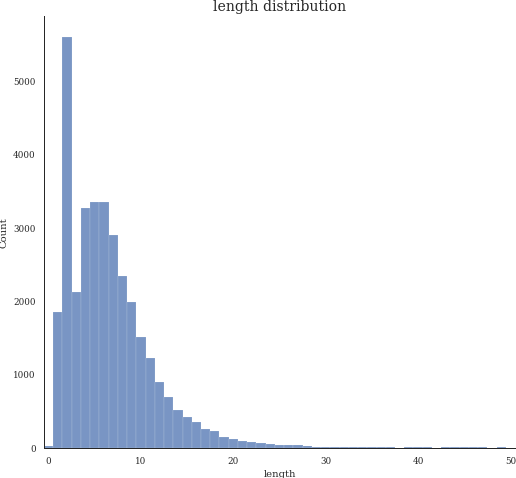

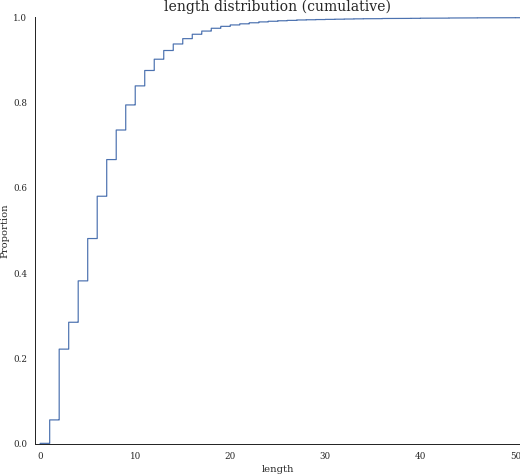

  0.08%    28 utterances have length   0
  5.58%  1854 utterances have length   1
 22.18%  5600 utterances have length   2
 28.48%  2126 utterances have length   3
 38.18%  3274 utterances have length   4
 48.11%  3349 utterances have length   5
 58.03%  3347 utterances have length   6
 66.63%  2900 utterances have length   7
 73.56%  2339 utterances have length   8
 79.44%  1984 utterances have length   9
 83.91%  1507 utterances have length  10
 87.52%  1218 utterances have length  11
 90.16%   892 utterances have length  12
 92.20%   689 utterances have length  13
 93.73%   516 utterances have length  14
 94.98%   422 utterances have length  15
 96.01%   347 utterances have length  16
 96.76%   253 utterances have length  17
 97.42%   221 utterances have length  18
 97.87%   152 utterances have length  19
 98.20%   112 utterances have length  20
 98.46%    88 utterances have length  21
 98.71%    83 utterances have length  22
 98.91%    69 utterances have length  23
 99.06%    50 ut

/tmp/ipykernel_27754/1222693688.py:23: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  counter = Counter(value for index, value in s.iteritems())


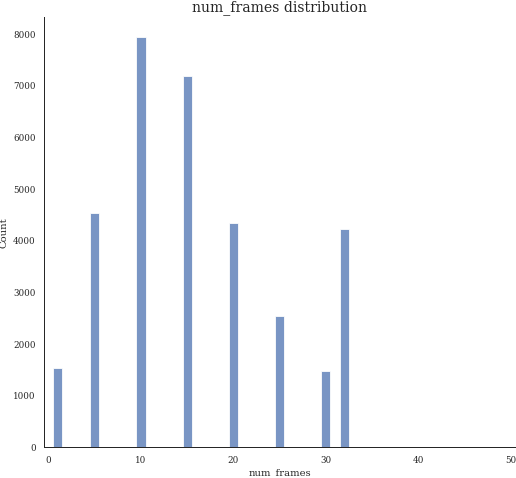

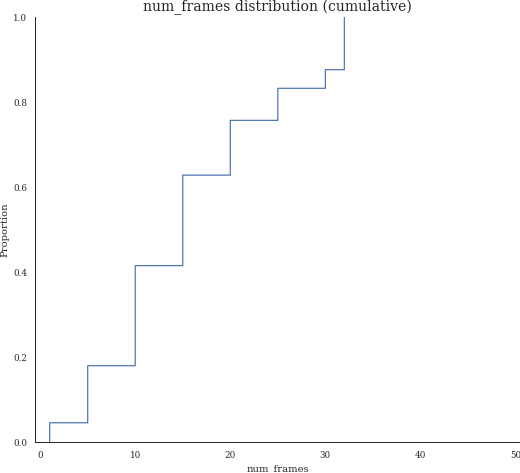

  4.52%  1526 utterances have num_frames   1
 17.94%  4526 utterances have num_frames   5
 41.46%  7934 utterances have num_frames  10
 62.73%  7176 utterances have num_frames  15
 75.60%  4343 utterances have num_frames  20
 83.13%  2541 utterances have num_frames  25
 87.51%  1476 utterances have num_frames  30
100.00%  4215 utterances have num_frames  32
UNK rate:  0.26% OOV rate:  1.74% total OOV rate:  1.99%
1-gram:
total: 5559 total occurances: 225001
n_oov_grams = 3212  vocab_coverage = 42.22%
most common:
  7.41% 16676 .
 11.75%  9768 ,
 15.92%  9386 you
 19.68%  8456 ?
 22.33%  5950 the
 24.52%  4939 yeah
 26.71%  4932 's
 28.81%  4709 a
 30.86%  4628 to
 32.88%  4542 it
 34.66%  4007 and
 36.36%  3821 that
 37.83%  3312 we
 39.19%  3051 i
 40.51%  2981 there
 41.81%  2908 is
 43.09%  2876 do
 44.35%  2852 want
 45.28%  2087 are
 46.20%  2064 "
 47.07%  1954 go
 47.88%  1841 can
 48.70%  1829 !
 49.50%  1806 on
 50.29%  1781 okay
 51.04%  1684 in
 51.77%  1647 your
 52.48%  16

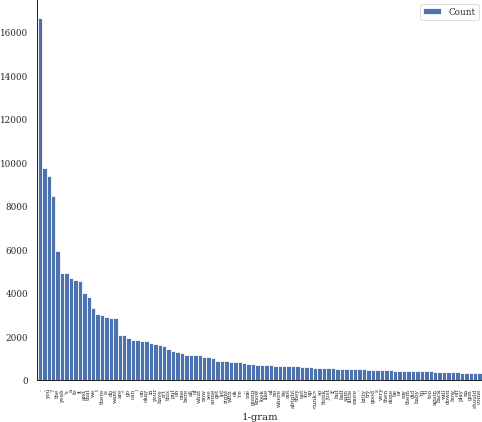

2-gram:
total: 39429 total occurances: 191292
n_oov_grams = 6292  vocab_coverage = 84.04%
most common:
  1.12%  2134 you want
  2.08%  1844 yeah .
  2.96%  1680 want to
  3.72%  1466 that 's
  4.29%  1085 yeah ,
  4.82%  1009 do you
  5.31%   937 it 's
  5.78%   909 's a
  6.24%   881 there 's
  6.70%   862 do n't
  7.13%   825 , you
  7.48%   682 let 's
  7.83%   662 you can
  8.15%   605 in the
  8.46%   602 , and
  8.77%   602 have to
  9.06%   545 are you
  9.34%   543 going to
  9.63%   542 can you
  9.90%   520 okay .
 10.17%   520 okay ,
 10.44%   518 we go
 10.69%   478 , i
 10.93%   453 go .
 11.16%   446 oh ,
 11.39%   441 and a
 11.62%   440 's right
 11.85%   432 it ?
 12.07%   423 , that
 12.29%   419 's the
 12.50%   409 and there
 12.71%   408 we can
 12.92%   402 look at
 13.13%   401 i 'm
 13.34%   398 , yeah
 13.55%   397 you have
 13.76%   396 you are
 13.96%   395 you 're
 14.17%   389 to put
 14.37%   386 to go
 14.57%   382 it .
 14.76%   374 i know
 14.96%   374 

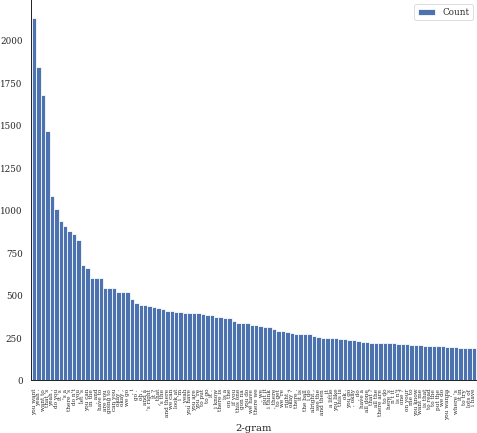

3-gram:
total: 80747 total occurances: 159437
n_oov_grams = 7756  vocab_coverage = 90.39%
most common:
  0.75%  1194 you want to
  1.17%   670 do you want
  1.43%   423 that 's right
  1.66%   362 there 's a
  1.86%   319 there we go
  2.05%   294 that 's a
  2.22%   277 , that 's
  2.39%   274 we go .
  2.53%   226 i do n't
  2.67%   219 's right .
  2.80%   210 and there 's
  2.93%   209 , you want
  3.06%   209 you do n't
  3.19%   204 want me to
  3.32%   196 want to go
  3.44%   192 , yeah .
  3.55%   185 we have to
  3.66%   180 n't it ?
  3.77%   172 want to try
  3.88%   172 is n't it
  3.98%   162 do n't want
  4.08%   159 you want me
  4.18%   159 there is a
  4.28%   156 want to read
  4.38%   153 , let 's
  4.47%   149 let 's see
  4.56%   149 , it 's
  4.65%   147 where 's the
  4.75%   147 let 's go
  4.84%   145 there you go
  4.93%   140 yeah , you
  5.01%   140 put it in
  5.10%   138 you have to
  5.18%   132 , do you
  5.26%   126 it 's a
  5.34%   124 , okay ?
  5.4

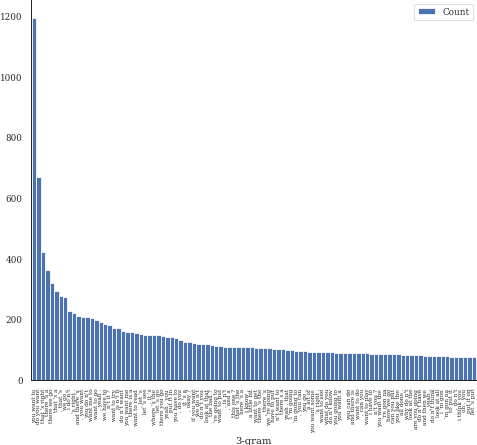

4-gram:
total: 97989 total occurances: 133182
n_oov_grams = 8616  vocab_coverage = 91.21%
most common:
  0.29%   385 do you want to
  0.45%   217 that 's right .
  0.61%   204 there we go .
  0.72%   158 you want me to
  0.84%   150 you want to go
  0.95%   145 is n't it ?
  1.04%   124 you want to read
  1.13%   123 , you want to
  1.22%   119 and there 's a
  1.31%   116 you want to try
  1.38%    97 i 'm going to
  1.45%    96 , is n't it
  1.52%    91 that 's right ,
  1.59%    91 do n't want to
  1.66%    90 you do n't want
  1.72%    89 you want to get
  1.79%    84 you want to put
  1.85%    84 i do n't know
  1.91%    82 , do you want
  1.97%    78 i 'm gon na
  2.03%    77 we 're going to
  2.09%    77 i do n't think
  2.14%    75 yeah , that 's
  2.19%    70 you want to do
  2.25%    69 are you going to
  2.30%    68 do you want me
  2.35%    66 there you go .
  2.40%    66 , that 's right
  2.44%    61 here we go .
  2.49%    60 you can do it
  2.53%    59 and you know it
  

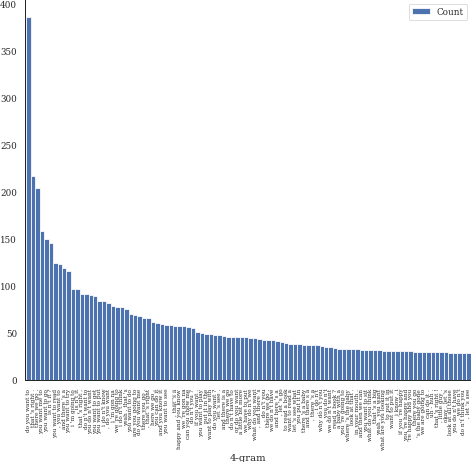

val split:
n_examples: 1874
length distribution:
total: 12355, mean: 6.593, min: 1, max: 110


/tmp/ipykernel_27754/1222693688.py:23: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  counter = Counter(value for index, value in s.iteritems())


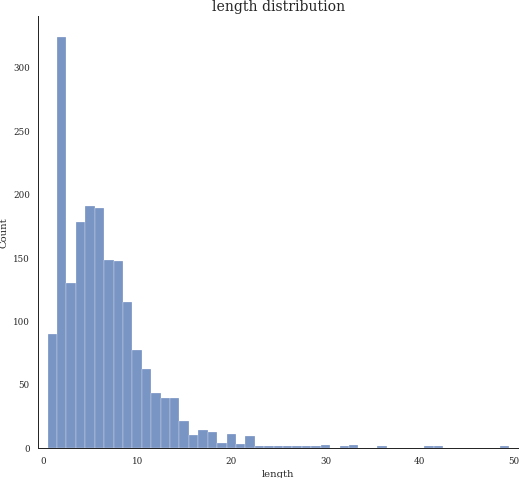

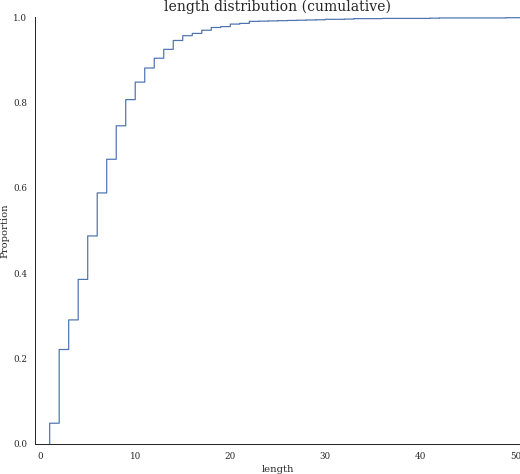

  4.80%    90 utterances have length   1
 22.09%   324 utterances have length   2
 29.03%   130 utterances have length   3
 38.53%   178 utterances have length   4
 48.72%   191 utterances have length   5
 58.80%   189 utterances have length   6
 66.70%   148 utterances have length   7
 74.55%   147 utterances have length   8
 80.68%   115 utterances have length   9
 84.79%    77 utterances have length  10
 88.10%    62 utterances have length  11
 90.39%    43 utterances have length  12
 92.48%    39 utterances have length  13
 94.56%    39 utterances have length  14
 95.68%    21 utterances have length  15
 96.21%    10 utterances have length  16
 96.96%    14 utterances have length  17
 97.60%    12 utterances have length  18
 97.81%     4 utterances have length  19
 98.40%    11 utterances have length  20
 98.56%     3 utterances have length  21
 99.04%     9 utterances have length  22
 99.09%     1 utterances have length  23
 99.15%     1 utterances have length  24
 99.20%     1 ut

/tmp/ipykernel_27754/1222693688.py:23: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  counter = Counter(value for index, value in s.iteritems())


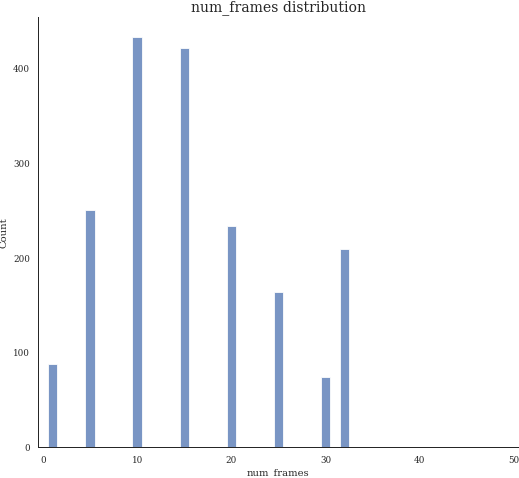

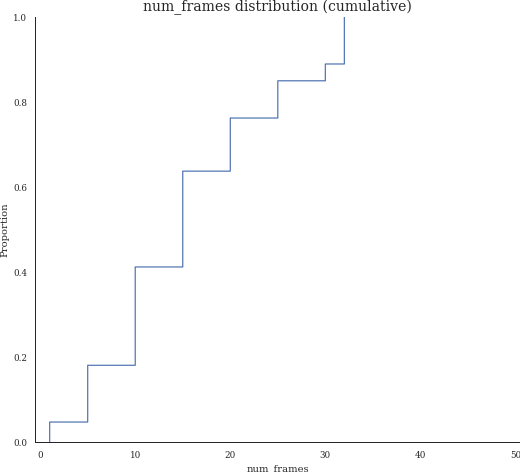

  4.70%    88 utterances have num_frames   1
 18.04%   250 utterances have num_frames   5
 41.14%   433 utterances have num_frames  10
 63.66%   422 utterances have num_frames  15
 76.15%   234 utterances have num_frames  20
 84.90%   164 utterances have num_frames  25
 88.85%    74 utterances have num_frames  30
100.00%   209 utterances have num_frames  32
UNK rate:  0.24% OOV rate:  2.18% total OOV rate:  2.42%
1-gram:
total: 1322 total occurances: 12355
n_oov_grams = 249  vocab_coverage = 81.16%
most common:
  7.66%   946 .
 12.25%   568 ,
 16.46%   520 you
 20.13%   453 ?
 22.70%   317 the
 24.84%   265 's
 26.89%   253 yeah
 28.90%   248 it
 30.89%   247 a
 32.75%   229 that
 34.59%   227 and
 36.38%   222 to
 37.94%   193 we
 39.32%   170 there
 40.65%   164 i
 41.89%   154 do
 43.06%   144 is
 44.16%   136 are
 45.22%   131 "
 46.24%   126 want
 47.10%   106 !
 47.94%   104 on
 48.77%   102 can
 49.57%    99 okay
 50.34%    96 go
 51.12%    96 have
 51.83%    88 n't
 52.49%    8

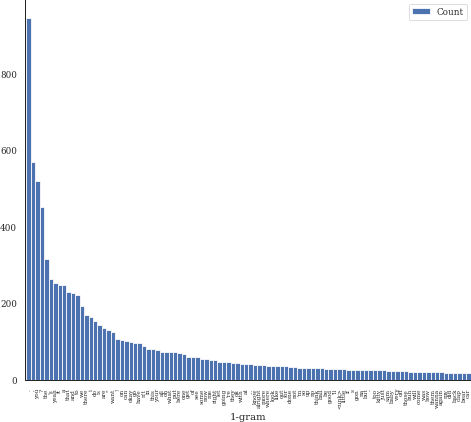

2-gram:
total: 5165 total occurances: 10481
n_oov_grams = 431  vocab_coverage = 91.66%
most common:
  0.99%   104 yeah .
  1.96%   101 you want
  2.87%    96 that 's
  3.51%    67 want to
  4.09%    61 do you
  4.66%    59 yeah ,
  5.09%    46 there 's
  5.52%    45 's a
  5.94%    44 it 's
  6.36%    44 , and
  6.78%    44 do n't
  7.16%    39 you can
  7.50%    36 going to
  7.82%    34 let 's
  8.15%    34 okay .
  8.46%    33 can you
  8.78%    33 , you
  9.08%    32 i 'm
  9.39%    32 are you
  9.69%    32 and a
  9.98%    30 we go
 10.26%    29 have to
 10.52%    28 in the
 10.79%    28 you have
 11.05%    27 's right
 11.31%    27 and there
 11.56%    27 gon na
 11.82%    27 you are
 12.07%    26 's the
 12.31%    25 okay ,
 12.55%    25 look at
 12.79%    25 , yeah
 13.02%    25 on the
 13.25%    24 we have
 13.48%    24 it .
 13.70%    23 you 're
 13.91%    22 it ?
 14.11%    21 this one
 14.31%    21 there we
 14.51%    21 oh ,
 14.71%    21 to put
 14.90%    20 go .
 15.09% 

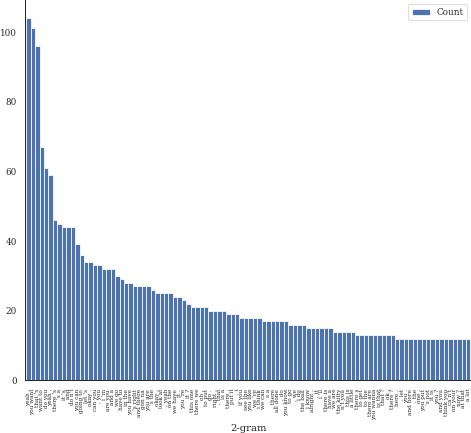

3-gram:
total: 6906 total occurances: 8697
n_oov_grams = 506  vocab_coverage = 92.67%
most common:
  0.57%    50 you want to
  0.99%    36 do you want
  1.29%    26 that 's right
  1.53%    21 there we go
  1.76%    20 there 's a
  1.93%    15 and there 's
  2.10%    15 , yeah .
  2.27%    14 i do n't
  2.41%    13 we go .
  2.56%    13 there s a
  2.71%    13 's right .
  2.86%    13 , that 's
  3.00%    12 that 's a
  3.14%    12 look at that
  3.28%    12 we have to
  3.41%    12 that 's the
  3.54%    11 the ball ?
  3.67%    11 i 'm gon
  3.79%    11 'm gon na
  3.91%    10 let 's go
  4.02%    10 do n't you
  4.14%    10 you have to
  4.24%     9 , let 's
  4.35%     9 , there 's
  4.45%     9 , it 's
  4.55%     9 you see the
  4.66%     9 , do n't
  4.76%     9 i think you
  4.85%     8 you going to
  4.94%     8 you want ?
  5.04%     8 yeah , you
  5.13%     8 n't you ?
  5.22%     8 want me to
  5.31%     8 what do you
  5.40%     8 , you want
  5.50%     8 do n't know
  5.5

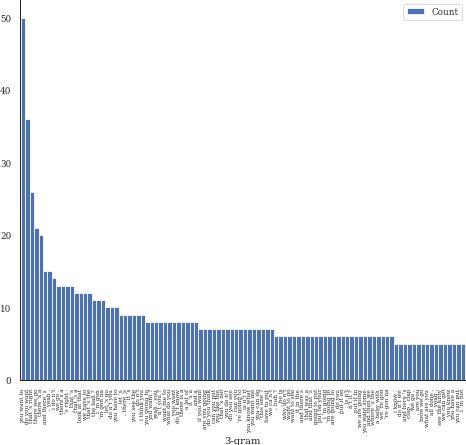

4-gram:
total: 6675 total occurances: 7237
n_oov_grams = 548  vocab_coverage = 91.79%
most common:
  0.21%    15 do you want to
  0.39%    13 that 's right .
  0.54%    11 there we go .
  0.69%    11 i 'm gon na
  0.82%     9 and there 's a
  0.93%     8 i do n't know
  1.02%     7 do you want ?
  1.12%     7 you want me to
  1.20%     6 and there s a
  1.29%     6 do you see the
  1.37%     6 i 'm going to
  1.45%     6 is n't it ?
  1.53%     6 we 're gon na
  1.60%     5 are you going to
  1.67%     5 , do n't you
  1.74%     5 do n't you ?
  1.81%     5 , is n't it
  1.88%     5 do you want me
  1.95%     5 you can do it
  2.02%     5 we are going to
  2.09%     5 that 's right ,
  2.16%     5 _ _ _ _
  2.21%     4 that 's right !
  2.27%     4 clap , clap ,
  2.32%     4 which one do you
  2.38%     4 one do you want
  2.43%     4 can you show me
  2.49%     4 you do n't want
  2.54%     4 you see the kitty
  2.60%     4 and you know it
  2.65%     4 we 're going to
  2.71%     4 

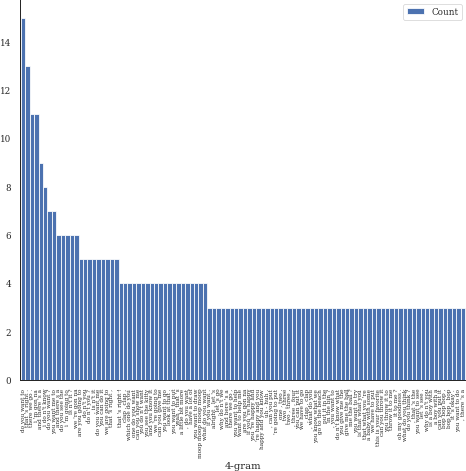

test split:
n_examples: 1875
length distribution:
total: 12418, mean: 6.623, min: 0, max: 69


/tmp/ipykernel_27754/1222693688.py:23: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  counter = Counter(value for index, value in s.iteritems())


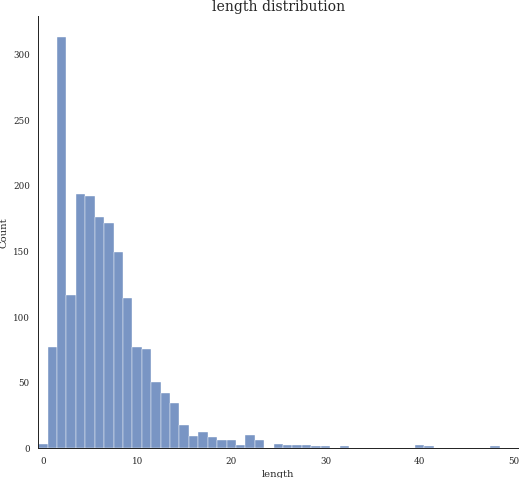

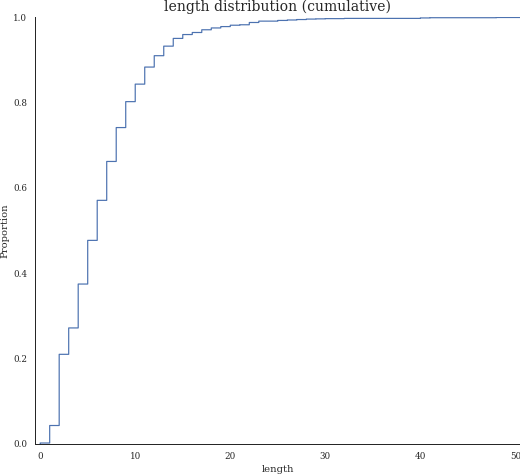

  0.16%     3 utterances have length   0
  4.27%    77 utterances have length   1
 20.96%   313 utterances have length   2
 27.15%   116 utterances have length   3
 37.44%   193 utterances have length   4
 47.68%   192 utterances have length   5
 57.07%   176 utterances have length   6
 66.19%   171 utterances have length   7
 74.13%   149 utterances have length   8
 80.21%   114 utterances have length   9
 84.32%    77 utterances have length  10
 88.32%    75 utterances have length  11
 90.99%    50 utterances have length  12
 93.23%    42 utterances have length  13
 95.04%    34 utterances have length  14
 95.95%    17 utterances have length  15
 96.43%     9 utterances have length  16
 97.07%    12 utterances have length  17
 97.49%     8 utterances have length  18
 97.81%     6 utterances have length  19
 98.13%     6 utterances have length  20
 98.24%     2 utterances have length  21
 98.77%    10 utterances have length  22
 99.09%     6 utterances have length  23
 99.25%     3 ut

/tmp/ipykernel_27754/1222693688.py:23: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  counter = Counter(value for index, value in s.iteritems())


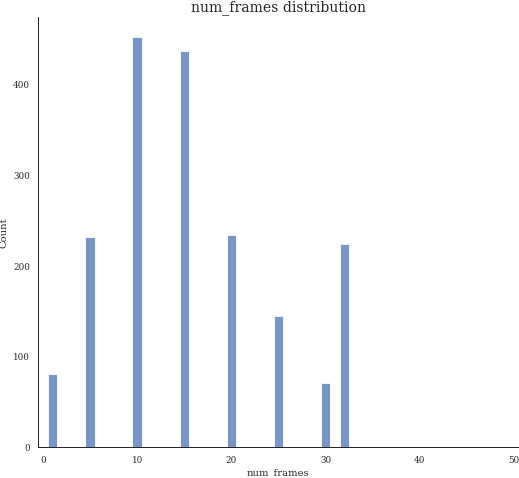

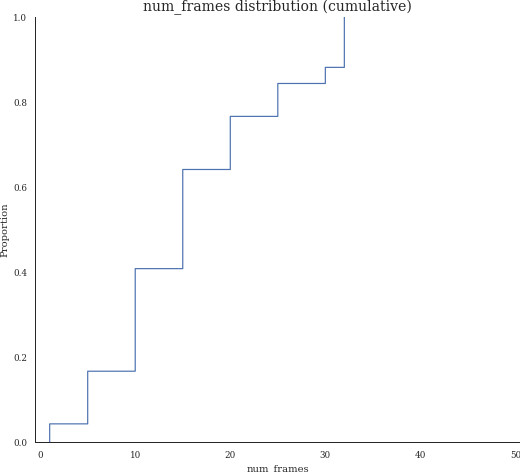

  4.27%    80 utterances have num_frames   1
 16.64%   232 utterances have num_frames   5
 40.75%   452 utterances have num_frames  10
 64.05%   437 utterances have num_frames  15
 76.53%   234 utterances have num_frames  20
 84.27%   145 utterances have num_frames  25
 88.05%    71 utterances have num_frames  30
100.00%   224 utterances have num_frames  32
UNK rate:  0.20% OOV rate:  2.59% total OOV rate:  2.79%
1-gram:
total: 1399 total occurances: 12418
n_oov_grams = 290  vocab_coverage = 79.27%
most common:
  7.61%   945 .
 11.72%   510 you
 15.59%   481 ,
 19.34%   466 ?
 21.98%   327 the
 24.40%   301 a
 26.79%   297 's
 28.97%   270 yeah
 31.04%   257 to
 32.98%   241 it
 34.81%   228 and
 36.65%   228 that
 38.11%   181 is
 39.52%   175 we
 40.90%   172 there
 42.24%   166 want
 43.49%   156 do
 44.68%   147 i
 45.69%   126 are
 46.61%   114 !
 47.47%   107 "
 48.32%   105 can
 49.15%   103 go
 49.94%    99 n't
 50.68%    92 on
 51.38%    86 your
 52.01%    78 okay
 52.63%    7

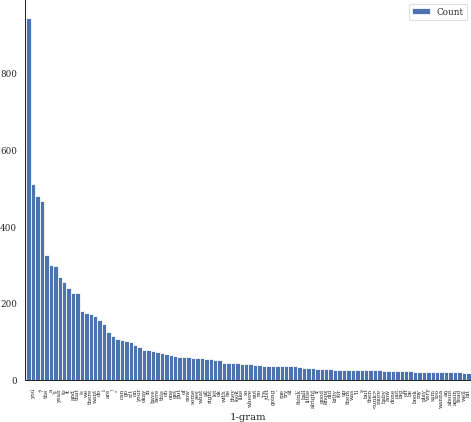

2-gram:
total: 5436 total occurances: 10546
n_oov_grams = 531  vocab_coverage = 90.23%
most common:
  1.09%   115 you want
  2.09%   105 yeah .
  3.07%   104 want to
  3.97%    95 that 's
  4.58%    64 's a
  5.13%    58 do you
  5.68%    58 yeah ,
  6.14%    48 there 's
  6.58%    47 it 's
  7.02%    46 do n't
  7.43%    44 , you
  7.83%    42 let 's
  8.19%    38 you can
  8.49%    31 are you
  8.78%    31 in the
  9.06%    29 we go
  9.32%    28 is a
  9.58%    27 okay .
  9.83%    27 there is
 10.09%    27 it .
 10.35%    27 we can
 10.60%    27 can you
 10.86%    27 it ?
 11.11%    27 , and
 11.36%    26 have to
 11.61%    26 and a
 11.85%    26 going to
 12.09%    25 's right
 12.33%    25 , that
 12.55%    24 if you
 12.77%    23 , i
 12.99%    23 you have
 13.21%    23 to get
 13.42%    22 you do
 13.63%    22 go .
 13.83%    22 look at
 14.04%    22 , yeah
 14.25%    22 you are
 14.45%    21 and there
 14.64%    20 i think
 14.83%    20 okay ,
 15.01%    19 to the
 15.19%    1

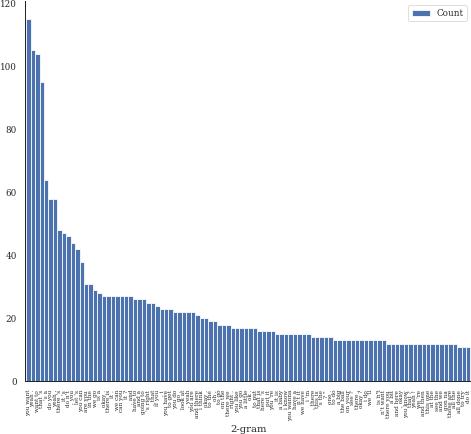

3-gram:
total: 7136 total occurances: 8751
n_oov_grams = 642  vocab_coverage = 91.00%
most common:
  0.73%    64 you want to
  1.17%    38 do you want
  1.47%    27 that 's a
  1.76%    25 that 's right
  2.02%    23 there 's a
  2.25%    20 , that 's
  2.46%    18 there we go
  2.64%    16 's right .
  2.82%    16 you do n't
  2.98%    14 we go .
  3.14%    14 , you want
  3.29%    13 , yeah .
  3.44%    13 do n't want
  3.58%    12 there is a
  3.71%    12 you have to
  3.85%    12 yeah , you
  3.98%    11 there you go
  4.10%    11 want to go
  4.23%    11 i do n't
  4.34%    10 want to try
  4.46%    10 if you want
  4.57%    10 _ _ _
  4.69%    10 n't it ?
  4.79%     9 and there 's
  4.89%     9 want to see
  4.98%     8 what do you
  5.07%     8 go to the
  5.17%     8 , let 's
  5.26%     8 put it in
  5.35%     8 is n't it
  5.44%     8 want me to
  5.53%     8 want to read
  5.62%     8 n't want to
  5.70%     7 here we go
  5.78%     7 where 's the
  5.86%     7 it 's a
  5.

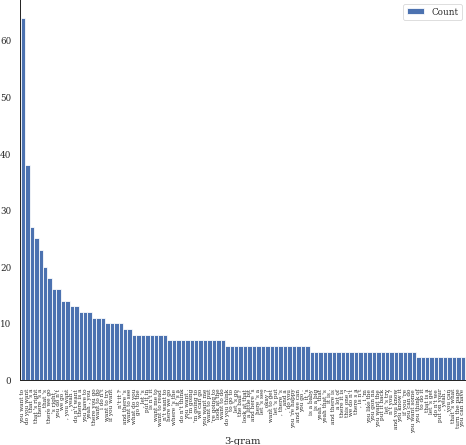

4-gram:
total: 6772 total occurances: 7269
n_oov_grams = 710  vocab_coverage = 89.52%
most common:
  0.37%    27 do you want to
  0.59%    16 that 's right .
  0.74%    11 you do n't want
  0.87%     9 there we go .
  0.98%     8 you want to go
  1.09%     8 , you want to
  1.20%     8 do n't want to
  1.29%     7 you want to see
  1.39%     7 i do n't think
  1.49%     7 _ _ _ _
  1.58%     7 i 'm going to
  1.68%     7 you want me to
  1.77%     7 you want to read
  1.86%     6 if you want .
  1.94%     6 you want to try
  2.01%     5 what do you think
  2.08%     5 to go to the
  2.15%     5 here we go .
  2.21%     5 and here 's a
  2.28%     5 and there 's a
  2.35%     5 is n't it ?
  2.42%     5 you want to put
  2.49%     5 you want to do
  2.56%     5 and you know it
  2.63%     5 if you 're happy
  2.68%     4 do you think of
  2.74%     4 there is a baby
  2.79%     4 yeah , that 's
  2.85%     4 you want to get
  2.90%     4 , i 'm going
  2.96%     4 'm going to put
  3.01

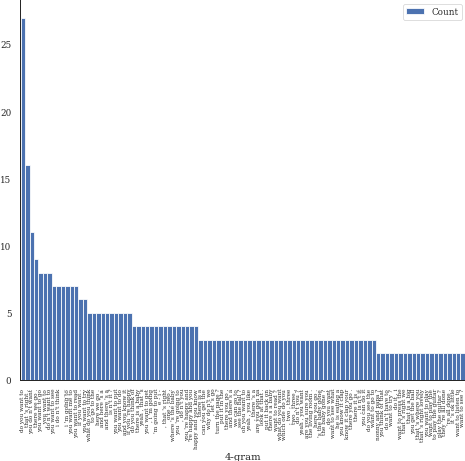

In [3]:
data = build_data()
vocab = data.datasets['train'].vocab
print(f'vocab size: {len(vocab)}')

splits = ['train', 'val', 'test']
datasets = {}
for split in splits:
    print(f'{split} split:')
    df = pd.DataFrame(data.datasets[split].data)

    # extract list of tokens from each utterance
    df['tokens'] = df.apply(lambda row: row['utterance'].split(), axis=1)
    df['length'] = df.apply(lambda row: len(row['tokens']), axis=1)

    # print some data statistics

    total_n_tokens = df['length'].sum()
    print(f"n_examples: {len(df)}")
    for field in ['length', 'num_frames']:
        s = df[field]
        print(f"{field} distribution:")
        print(f"total: {s.sum()}, mean: {s.mean():.3f}, min: {s.min()}, max: {s.max()}")
        counter = Counter(value for index, value in s.iteritems())
        tot = 0
        plot_dist(df, x=field, xlim_n=50, title=f'{field} distribution')
        for value, cnt in sorted(list(counter.items())):
            tot += cnt
            print(f"{tot / len(s):7.2%} {cnt:5} utterances have {field} {value:3}")

    # get OOV rates
    oov_cnt = 0
    unk_cnt = 0
    for i, tokens in enumerate(df['tokens']):
        for token in tokens:
            if token == UNK_TOKEN:
                unk_cnt += 1
            elif token not in vocab:
                oov_cnt += 1
    print(f"UNK rate: {unk_cnt / total_n_tokens :6.2%} OOV rate: {oov_cnt / total_n_tokens :6.2%} total OOV rate: {(unk_cnt + oov_cnt) / total_n_tokens :6.2%}")

    for n_gram in range(1, 5):
        gram_name = f'{n_gram}-gram'
        print(f'{gram_name}:')

        counter = Counter()
        for tokens in df['tokens']:
            counter.update(tuple(tokens[i:i+n_gram]) for i in range(len(tokens) - n_gram + 1))
        total_occurances = sum(counter.values())
        print(f'total: {len(counter)} total occurances: {total_occurances}')

        n_oov_grams = 0
        for gram in counter:
            is_oov_gram = False
            for word in gram:
                if word not in vocab:
                    is_oov_gram = True
            if is_oov_gram:
                n_oov_grams += 1
        vocab_coverage = 1 - n_oov_grams / len(counter)
        print(f'{n_oov_grams = }  {vocab_coverage = :6.2%}')

        print(f'most common:')
        s = 0
        for gram, cnt in counter.most_common(50):
            s += cnt
            print(f"{s / total_occurances:7.2%} {cnt:5} {' '.join(gram)}")

        cnt_tokens = defaultdict(list)
        for token, cnt in counter.items():
            cnt_tokens[cnt].append(token)
        s = 0
        oov_s = 0
        if n_gram == 1:
            tokenized_utterances = list(df['tokens'])
        for cnt in sorted(cnt_tokens.keys(), reverse=False)[:50]:
            n_tokens = len(cnt_tokens[cnt])
            s += n_tokens
            oov_s += n_tokens * cnt
            print_str = f'cover={oov_s / total_n_tokens:6.2%} {s / len(counter):7.2%} {len(cnt_tokens[cnt]):5} {gram_name}s occurred {cnt:2} times'
            if n_gram == 1:
                tokenized_utterances = [
                    [UNK_TOKEN if counter[(token,)] == cnt else token
                        for token in tokenized_utterance]
                    for tokenized_utterance in tokenized_utterances]
                unk_uttr_cnt = sum(int(UNK_TOKEN in tokenized_utterance) for tokenized_utterance in tokenized_utterances)
                unk_uttr_rate = unk_uttr_cnt / len(tokenized_utterances)
                print_str = print_str + f' {unk_uttr_rate=:6.2%}'
            print(print_str)

        counter_df = pd.DataFrame(counter.most_common(), columns=[gram_name, 'Count'])
        counter_df[gram_name] = counter_df[gram_name].map(' '.join)
        counter_df.iloc[:100].plot.bar(x=gram_name, width=1)
        plt.xticks(fontsize='xx-small')
        output_fig(f'{gram_name} Frequency')

    datasets[split] = df

query: sand
train split:
plotting 60/85 = 70.59% results:


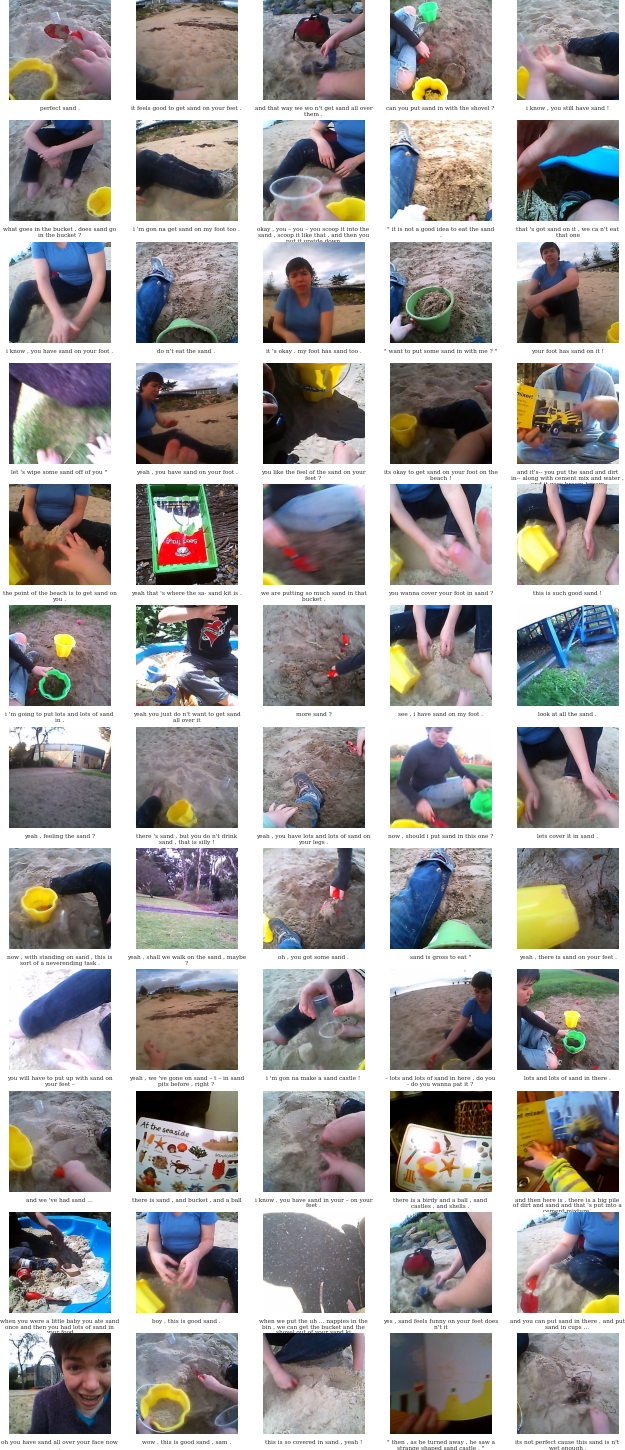

val split:
plotting 3/3 = 100.00% results:


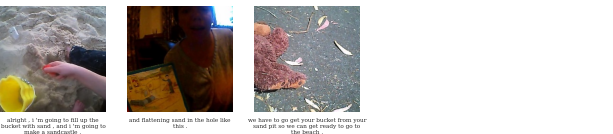

test split:
plotting 5/5 = 100.00% results:


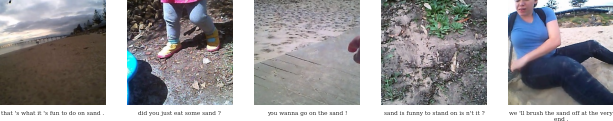

In [4]:
import random
from textwrap import wrap
from multimodal.attention_maps import imshow
from matplotlib.animation import FuncAnimation


# search query
query = input("query: ").split()
# if True, the entire utterance must match; otherwise must have all words in the query
exact_match = False
animate_all_frames = False
add_captions = True
# display at most N random results
N = 60
n_cols = 5

for split in splits:
    print(f'{split} split:')
    df = datasets[split]

    # return results matching query
    if exact_match:
        match = lambda tokens: tokens == query
    else:
        match = lambda tokens: all(query_word in tokens for query_word in query)
    results = df[df['tokens'].map(match)]

    num_results = min(N, len(results))
    print(f'plotting {num_results}/{len(results)} = {num_results/len(results) if len(results) != 0 else 1.:.2%} results:')
    if num_results == len(results):
        top_results = results
    else:
        top_results = results.sample(num_results)

    n_rows = get_n_rows(num_results, n_cols)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(fig_sz * n_cols, fig_sz * n_rows), squeeze=False)

    def show_results(frame_i, frame_frac=None):
        """Show results.
        frame_i: show the frame at frame_i % n_frames.
        frame_frac: if set, ignore frame_i.
                    Can be either float in [0, 1] so we show the frame at index floor(frame_frac * (n_frames - 1)),
                    or "random" so we show a random frame.
        """
        all_axs = itertools.chain.from_iterable(axs)
        for idx, result in top_results.iterrows():
            # get utterance
            utterance = result['utterance']

            # get frame
            frame_filenames = result['frame_filenames']
            n_frames = len(frame_filenames)
            if frame_frac is None:
                frame_idx = frame_i % n_frames
            else:
                if frame_frac == "random":
                    frame_idx = random.randrange(n_frames)
                else:
                    frame_idx = int(frame_frac * (n_frames - 1))
            frame_filename = frame_filenames[frame_idx]
            img = Image.open(EXTRACTED_FRAMES_DIRNAME / frame_filename)

            ax = next(all_axs)
            imshow(ax, img)
            if add_captions:
                ax.text(0.5, -0.05, "\n".join(wrap(utterance[:100], 40)), ha='center', va='top', transform=ax.transAxes, fontsize='xx-small')

        for ax in all_axs:
            ax.axis("off")

    if animate_all_frames:
        anim = FuncAnimation(
            fig,
            show_results,
            frames=max((len(result['frame_filenames']) for idx, result in top_results.iterrows()), default=0),
            interval=200,
        )

        #anim.save(f'{query}_{split}.mp4', writer='ffmpeg', fps=5, dpi=100)

        from IPython.display import HTML
        HTML(anim.to_html5_video())

    else:
        show_results(0)

    output_fig(f'Search results of {query} on {split} set')